In [155]:
import ecco
import pandas as pd
import numpy as np
import torch 

In [2]:
lm = ecco.from_pretrained("gpt2-xl")

## Datasets
1. Coinflip dataset from Wu et al. 
2. CSQA selection from Wu et al.

--> both shown to have an postive effect of CoT with GPT 7B (2B for the former) Wei et al. 

3. to decide 

#### coinFlip

In [9]:
# Define the file path
file_path = "coin_questions.txt"

# Initialize an empty list to store questions
coin_questions_list = []

# Read the questions from the file
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Remove the number at the beginning and append the question to the list
        question = line.strip().split(' ', 1)[1]
        coin_questions_list.append(question)

# Display the list of questions
for i, question in enumerate(coin_questions_list, start=1):
    print(f"{i}. {question}")


1. A coin is heads up. Matthew does not flip the coin. Lynn does not flip the coin. Is the coin still heads up?
2. A coin is heads up. Delphine flips the coin. Wesley does not flip the coin. Is the coin still heads up?
3. A coin is tails up. Grover flips the coin. Clarissa flips the coin. Is the coin still tails up?
4. A coin is heads up. Isaias flips the coin. Sharonda does not flip the coin. Is the coin still heads up?
5. A coin is tails up. Obie flips the coin. Sonja does not flip the coin. Is the coin still tails up?
6. A coin is heads up. Mckenzie does not flip the coin. Katherine flips the coin. Is the coin still heads up?
7. A coin is tails up. Racheal does not flip the coin. Deion flips the coin. Is the coin still tails up?
8. A coin is tails up. Lavon does not flip the coin. Loretto does not flip the coin. Is the coin still tails up?
9. A coin is heads up. Maddison flips the coin. Waymon does not flip the coin. Is the coin still heads up?
10. A coin is tails up. Mittie does no

#### CSQA

In [15]:
# Open the file "questions.txt" for reading
with open("csqa_questions.txt", "r") as file:
    # Read each line from the file and store them in a list
    questions = file.readlines()

# Remove any leading or trailing whitespace from each question
csaq_questions = [question.strip() for question in questions]

# Print the list of questions
for i, question in enumerate(csaq_questions, start=1):
    print(f"{i}. {question}")


1. What would children do if they are bored? A. walk, B. change shoes, C. play tag, D. smell smoke, E. reach over.
2. Behind what small door are canned goods usually kept in? A. cabinet, B. pantry, C. kitchen, D. cupboard, E. shelf.
3. While laid up in the hospital she tried remembering good times, like that massage on vacation that brought great what? A. dream, B. knowing, C. depression, D. pleasure, E. nostalgia.
4. If I want to maximize my number of potential customers, where should I build a new department store? A. idaho, B. shopping mall, C. big city, D. in town, E. new york.
5. Where is a good place to get a ball? A. kitchen, B. child’s hand, C. street, D. toy store, E. soccer game.
6. What common chemical reaction is often used as a heat source? A. coal or wood, B. fire, C. lava, D. house, E. solar energy.
7. Where could you put a dollar that would make it hard to get out without breaking? A. cash drawer, B. piggy bank, C. purse, D. box, E. pocket.
8. I’m at a restaurant and wa

#### CoT Prompts

In [131]:
# Open the file for reading
with open("coin_cot_3.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin = file.read()

# Open the file for reading
with open("Cot_csqa.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_csqa = file.read()

#### Irrelevant Prompts



In [5]:
# Open the file for reading
with open("coin_cot_irrelevant_3.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin_irr = file.read()

#### False reasoning CoT 


In [6]:
# Open the file for reading
with open("coin_cot_wrong_3.txt", "r") as file:
    # Read the entire content of the file into a single string
    cot_coin_false = file.read()

#### "Lets think step by step"

In [2]:
# Open the file for reading
with open("step_by_step.txt", "r") as file:
    # Read the entire content of the file into a single string
    step_by_step = file.read()

## Load GPT-Model

In [7]:
lm = ecco.from_pretrained("gpt2-xl")

## Experiment 1 - Mean attribution scores

### CoinFlip dataset

Question 1: How do mean saliency scores of relevant input tokens with “let’s think step by step”, false reasons or  irrelevant information compare? 

Get Input_x_Gradient scores of selected words for each question of a dataset when using standard vs. CoT prompting vs. irrelevant infromation of same length. Aggregate the results and plot. 

0. get generated outputs for each prompting type for each question 
1. get index of answer word y^* and use said index to get attribution scores (of all prior inputs (xi + y^pre)) for that answer word.
2. get_indices_of_relevant_attr
3. get_relevant_attr_scores


In [197]:
#get generated response objects with irr. 
outputs_coin_cot_irr = []

for coin_question in coin_questions_list[:5]: 
    prompt = cot_coin_irr + "Q: " + coin_question
    output = lm.generate(prompt, max_length = 205, do_sample=False, attribution=['grad_x_input'])
    outputs_coin_cot_irr.append(output) 

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
#get generated response objects with step by step prompt 
outputs_coin_cot_think = []

for coin_question in coin_questions_list[:2]: 
    prompt = step_by_step + "Q: " + coin_question
    output = lm.generate(prompt, max_length = 47, do_sample=False, attribution=['grad_x_input'])
    outputs_coin_cot_think.append(output) 

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [261]:
#get generated response objects with cot 
outputs_coin_cot = []

for coin_question in coin_questions_list[:1]: 
    prompt = cot_coin + " Q: " + coin_question
    output = lm.generate(prompt, max_length = 335, do_sample=False, attribution=['grad_x_input'])
    outputs_coin_cot.append(output) 



<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#get generated response objects with false cot 
outputs_coin_cot_false = []

for coin_question in coin_questions_list[:1]: 
    prompt = cot_coin_false + " Q: " + coin_question
    output = lm.generate(prompt, max_length = 335, do_sample=False, attribution=['grad_x_input'])
    outputs_coin_cot_false.append(output) 

In [260]:
##########################
#irrelevant information 
##########################

###Step 1

## get token_id of answer word y^*
answer = " yes no"

coin_answer_word_output = lm.generate(answer, max_length=3, do_sample=False)

yes_id = np.atleast_1d(coin_answer_word_output.token_ids[0][0])

no_id = np.atleast_1d(coin_answer_word_output.token_ids[0][1])

answer = np.concatenate([yes_id, no_id])


##get index of answer word y^*
answer_index_irr_list = []

for output in outputs_coin_cot_irr: 
    answer_index_irr_list.append(find_last_matching_index(output.token_ids[0, :], answer))


##use said index to get attribution scores (of all prior inputs (xi + y^pre)) for that answer word.
answer_attr_irr_list = get_answer_attr(answer_index_irr_list, outputs_coin_cot_irr )


###Step 2
indices_of_relevant_attr_list = get_indices_of_relevant_attr_list(outputs_coin_cot_irr, coin_rel_token_id_values)

###Step 3
coin_results_irr = get_relevant_attr_scores(indices_of_relevant_attr_list, answer_attr_irr_list)

###Step 4
mean_irr, std_irr = mean_value_across_dataset(coin_results_irr)

print (f"This is the mean:{mean_irr} and std: {std_irr})



<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

These are the found indices of the answer word for each generated output:  [19, 15, 21, 15, 19]
This list contains the indices of the relveant attribution scores of the 0th output: [  5   6   9  15  23  24  52  53  58  65  73  74 102 103 108 114 115 116
 124 125 154 155 158 159 160 165 166 167 175 176]
This list contains the indices of the relveant attribution scores of the 1th output: [  5   6   9  15  23  24  52  53  58  65  73  74 102 103 108 114 115 116
 124 125 154 155 160 165 166 167 175 176]
This list contains the indices of the relveant attribution scores of the 2th output: [  5   6   9  15  23  24  52  53  58  65  73  74 102 103 108 114 115 116
 124 125 155 159 165 174]
This list contains the indices of the relveant attribution scores of the 3th output: [  5   6   9  15  23  24  52  53  58  65  73  74 102 103 108 114 115 116
 124 125 154 155 160 166 167 168 176 177]
This list contains the indices of the relveant attribution scores of the 4th output: [  5   6   9  15  23  24  5

In [256]:
##########################
#lets_think_step_by_step
##########################

##STEP 1

## get token_id of answer word y^*
answer = " yes no Yes No"

coin_answer_word_output = lm.generate(answer, max_length=5, do_sample=False)

yes_id = np.atleast_1d(coin_answer_word_output.token_ids[0][0])

no_id = np.atleast_1d(coin_answer_word_output.token_ids[0][1])

Yes_id = np.atleast_1d(coin_answer_word_output.token_ids[0][2])

No_id = np.atleast_1d(coin_answer_word_output.token_ids[0][3])

answer = np.concatenate([yes_id, no_id, Yes_id, No_id])


#get index of answer word y^*
answer_index_step_list = []

for output in outputs_coin_cot_think: 
    answer_index_step_list.append(find_last_matching_index(output.token_ids[0, :], answer))


#use said index to get attribution scores (of all prior inputs (xi + y^pre)) for that answer word.
answer_attr_step_list = get_answer_attr(answer_index_step_list, outputs_coin_cot_think)


##Step 2
indices_of_relevant_attr_list = get_indices_of_relevant_attr_list(outputs_coin_cot_think, coin_rel_token_id_values)

##Step 3
coin_results_irr = get_relevant_attr_scores(indices_of_relevant_attr_list, answer_attr_step_list)

##Step 4
mean_step, std_step = mean_value_across_dataset(coin_results_irr)


print(mean,std)



<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

These are the found indices of the answer word for each generated output:  [2, 2]
Each list contains the indices of the relveant attribution scors: [17 18 21 22 23 28 29 30 38 39]
Each list contains the indices of the relveant attribution scors: [17 18 23 28 29 30 38 39]
0.018046375 0.001090074


In [14]:
######
#COT
######

##STEP 1 

#get index of answer word y^*
answer_index_cot_list = []

for output in outputs_coin_cot: 
    answer_index_cot_list.append(find_last_matching_index(output.token_ids[0, :], answer))


#use said index to get attribution scores (of all prior inputs (xi + y^pre)) for that answer word.
answer_attr_cot_list = get_answer_attr(answer_index_cot_list, outputs_coin_cot)


##Step 2
indices_of_relevant_attr_list = get_indices_of_relevant_attr_list(outputs_coin_cot, coin_rel_token_id_values)

##Step 3
coin_results_cot = get_relevant_attr_scores(indices_of_relevant_attr_list, answer_attr_cot_list)

##Step 4
mean_cot, std_cot = mean_value_across_dataset(coin_results_cot)


print(mean,std)

In [ ]:
#OLD
outputs_attr_coin_cot = []

outputs_attr_coin_cot.append(outputs_coin_cot[0].attribution["grad_x_input"][-2]) 
outputs_attr_coin_cot.append(outputs_coin_cot[1].attribution["grad_x_input"][-2]) 
outputs_attr_coin_cot.append(outputs_coin_cot[2].attribution["grad_x_input"][-1]) 

ALL FUNCTIONS:

In [157]:
def find_last_matching_index(long_tensor, short_array):
    # Initialize last_matching_index with -1
    last_matching_index = -1 

    # Iterate through the long tensor
    for i, long_value in enumerate(long_tensor):
        for short_value in short_array:
            if long_value.item() == short_value:
                last_matching_index = i

    return last_matching_index


197

In [254]:
def get_answer_attr(answer_index_list, outputs):
    """
        Gets the array of attribtuion scores for a the inputed index of the answer word.  
        Args:
            answer_index_list: list of integers that each represent the index of the answer word in the generated output 
            outputs: list of generated output objects 
        Returns: 
            list of arrays that are each the attribution scores wrt. to the given answer word
        """
    answer_attribution_index_list = []

    for i in range(len(outputs)): 
        n_input_tokens = outputs[i].n_input_tokens
        answer_attribution_index = answer_index_list[i] - n_input_tokens
        if answer_attribution_index >=0: 
            answer_attribution_index_list.append(answer_attribution_index)
        else: 
            raise ValueError("Index of Answer word is to wrong, i.e. answer word was chosen to be one of the input tokens and not a token from the generated answer.")

    print("These are the found indices of the answer word for each generated output: ", answer_attribution_index_list)
    outputs_answer_attr = []  # list of attribution scores wrt. answer word of each question.

    for i, j in enumerate(answer_attribution_index_list):
        outputs_answer_attr.append(outputs[i].attribution["grad_x_input"][j])

    return outputs_answer_attr

In [81]:
# coindataset relevant words:  tails, heads, up, does, not, flip, flips
# get input_ids for these words

# Define the relevant words and their order
coin_rel_words = " tails heads up does not flip flips".split()

# Generate the token IDs for the relevant words
coin_rel_words_output = lm.generate(" ".join(coin_rel_words), max_length=8, do_sample=False)

# Create a dictionary to map words to their token IDs
word_to_token_id = {word: token_id for word, token_id in zip(coin_rel_words, coin_rel_words_output.token_ids[0])}

# Create list with all the relvenat token_ids 
word_to_token_id_values = word_to_token_id.values()
word_to_token_id_values_list = list(word_to_token_id_values)

# Convert the list of values to a NumPy array
coin_rel_token_id_values = np.array(word_to_token_id_values_list)

print(coin_rel_token_id_values)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

[26404  6665   510   857   407 14283 45971]


In [99]:
#we have array of attributions for each answer
#now select only the attributions scores of relevant input tokens

def get_indices_of_relevant_attr_list(list_of_output_objects, relevant_tokens):
    """
        Generates indices of relevant attribution scores for each generated ouput object and comprehendes into a list
        Args:
            list_of_output_objects: list of generated ouput objects
            relevant_tokens: np array of relevant tokens ids 
        """
    
    # Initialize a list to store matching indices for each output
    matching_indices_list = []

    # Loop through each output object:
    for output in list_of_output_objects:
        # Access the token_ids array for the current output
        input_ids_of_fulloutput_array = np.array(output.token_ids[0, :])

        # Use np.where to find the indices where values match
        matching_indices = np.where(np.isin(input_ids_of_fulloutput_array, relevant_tokens))

        # Extract the values from the tuple and append to the list
        matching_indices = matching_indices[0].tolist()

        # Append the matching_indices to the list
        matching_indices_list.append(matching_indices)

    return matching_indices_list



In [259]:
### use indices to get all the attribution scores of relevant words ###

def get_relevant_attr_scores(indices_of_relevant_attr_list, output_attr):
    """
        Generates 
        Args:
            indices_of_relevant_attr_list: list of lists with indices of relevant attribtuion scores 
            output_attr: list of arrays that contain attribution scores (of the target answer) for each generated ouput 
        """
    relevant_attr_scores_list = []

    for n, output in enumerate(output_attr):
        
        # Remove indices that are after the answer word
        threshold = output.size

        final_attr_indices = [x for x in indices_of_relevant_attr_list[n] if np.all(x <= threshold)]

        final_attr_indices = np.array(final_attr_indices)
        
        print(f"This list contains the indices of the relveant attribution scores of the {n}th output:", final_attr_indices)
        
        # Use the indices array to index the output attribution array and extract the values
        relevant_attr_scores = output[final_attr_indices]

        relevant_attr_scores_list.append(relevant_attr_scores)

    return relevant_attr_scores_list



In [122]:
# Final statistics 
def mean_value_across_dataset (relevant_attr_scores):
    """"
        Calulates the mean and std of relevant_attr_scores of all arrays (aka all questions) 
        Args:
            relevant_attr_scores: list of arrays that contain the relevant attr. scores
        Retruns: 
            Two integers
        """
            
    mean_values = []

    for i in relevant_attr_scores: 
        mean = np.mean(i)
        mean_values.append(mean)

    mean_value_across_dataset = np.mean(mean_values)
    std_value_across_dataset = np.std(mean_values)

    return mean_value_across_dataset, std_value_across_dataset



## Experiment 2 - Importance own reasoning?

Question 2: How important is its own generated reasoning for the final answer? What percentage of attribution (how much weight) of the final answer is the question, the examples and what its own generated reasoning? 

## Experiment 3 - Layer anaylsis 

Question 3: Does Cot vs. std prompt change ranking of the answer throughout the layers? Would expect the answer to appear earlier, more robust. 

In [262]:
lm = ecco.from_pretrained("gpt2-xl", activations = True )

In [275]:
###########
#irrelevant
###########

#get generated response objects with irr. 
layer_outputs_coin_cot_irr = []

for coin_question in coin_questions_list[:3]: 
    prompt = cot_coin_irr + "Q: " + coin_question
    output = lm.generate(prompt, max_length = 205, do_sample=False)
    layer_outputs_coin_cot_irr.append(output) 



<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [265]:
# What are the token IDs of the two words?
ids = lm.tokenizer(" yes no")
print(ids)

{'input_ids': [3763, 645], 'attention_mask': [1, 1]}

In [282]:
# get index position of answer word

layer_answer_index_list = []

for output in layer_outputs_coin_cot_irr: 

    answer_index = find_last_matching_index(output.token_ids[0],ids["input_ids"])

    layer_answer_index_list.append(answer_index)

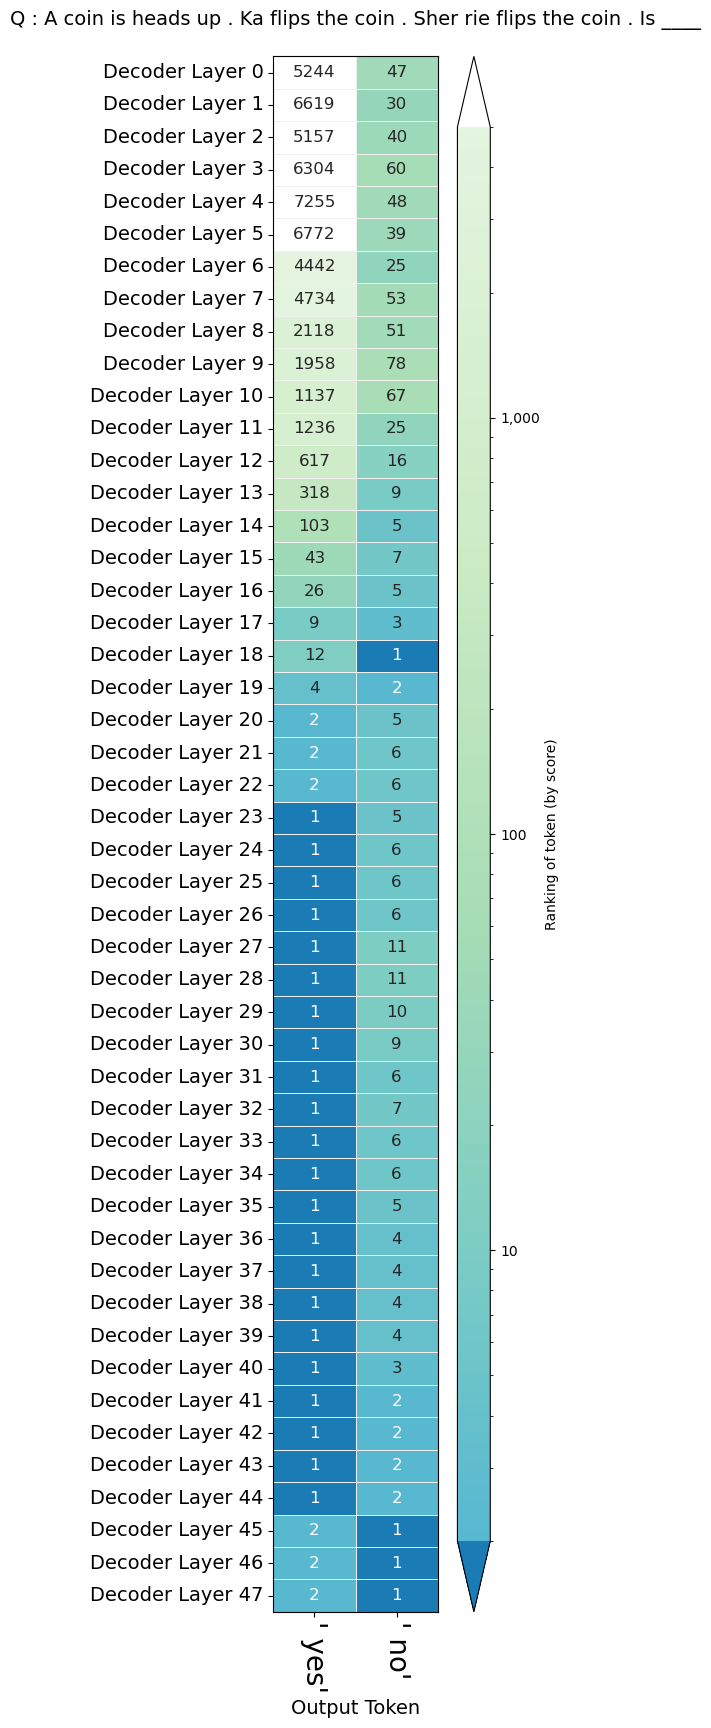

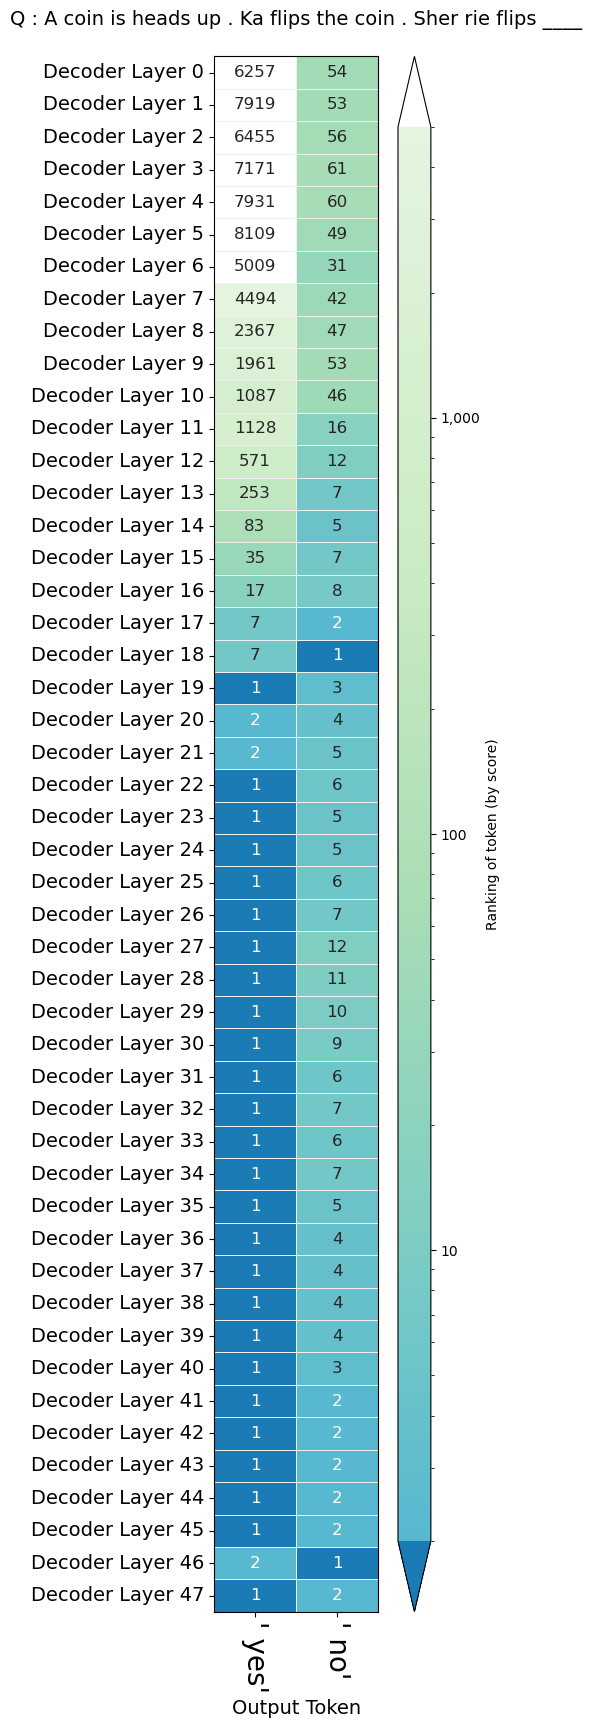

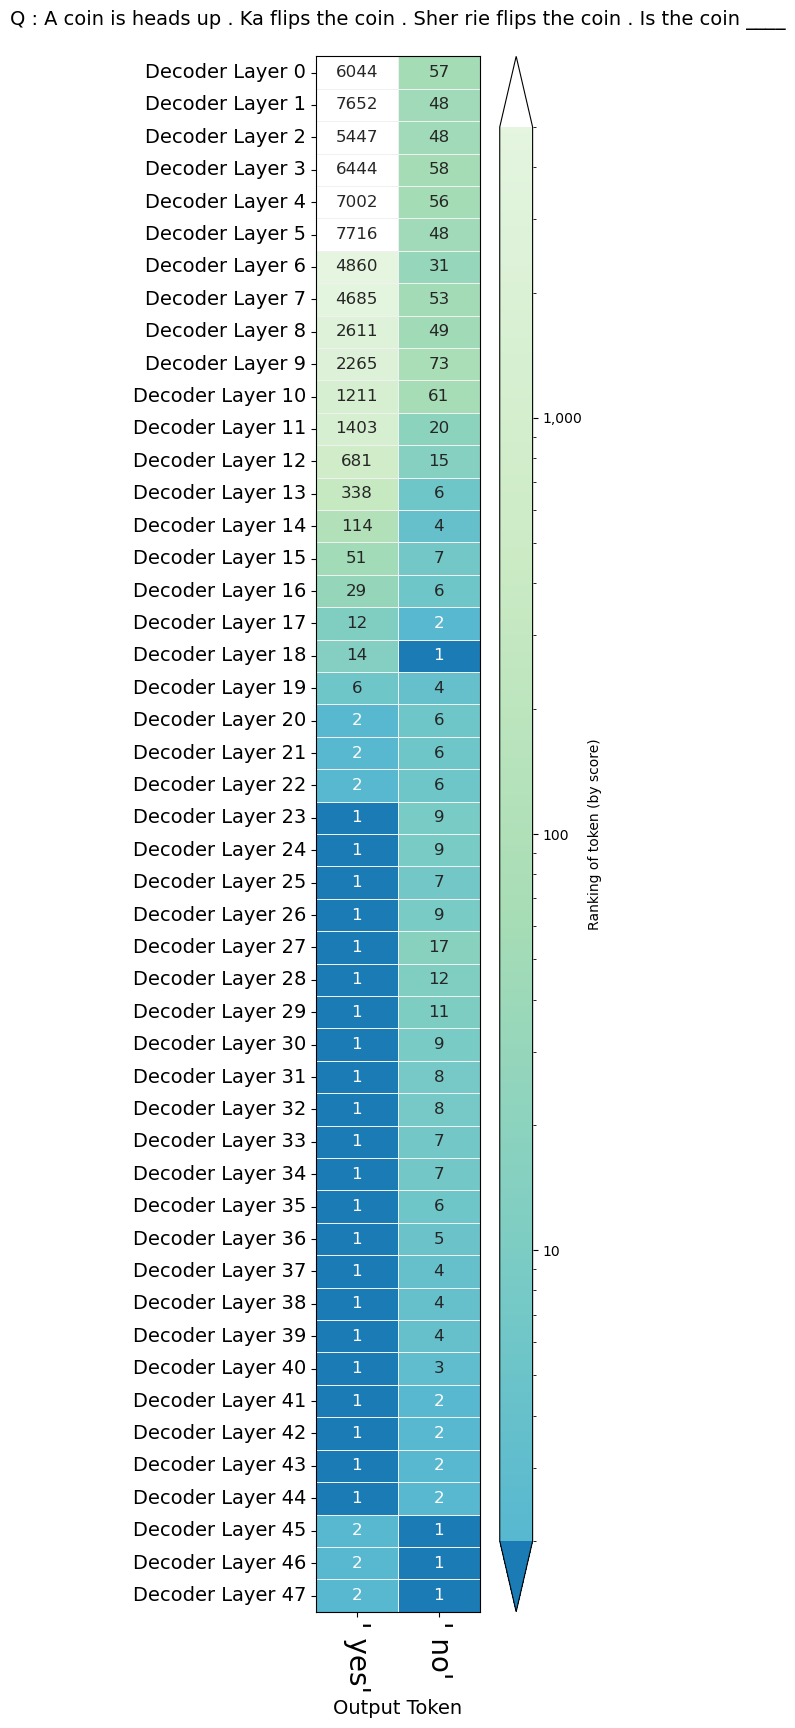

In [285]:
# Compare the rankings of "yes" and "no" across layers
for output, answer_index in zip(layer_outputs_coin_cot_irr, layer_answer_index_list):
    output.rankings_watch(watch=[ids["input_ids"][0],ids["input_ids"][1] ], position=answer_index)

In [286]:
#######
#Cot
#######

#get generated response objects with cot 
layer_outputs_coin_cot = []

for coin_question in coin_questions_list[:3]: 
    prompt = cot_coin + " Q: " + coin_question
    output = lm.generate(prompt, max_length = 335, do_sample=False)
    layer_outputs_coin_cot.append(output) 

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# get index position of answer word
layer_cot_answer_index_list = []

for output in layer_outputs_coin_cot: 

    answer_index = find_last_matching_index(output.token_ids[0],ids["input_ids"])

    layer_cot_answer_index_list.append(answer_index)

# Compare the rankings of "yes" and "no" across layers

for output, answer_index in zip(layer_outputs_coin_cot, layer_cot_answer_index_list):
    output.rankings_watch(watch=[ids["input_ids"][0],ids["input_ids"][1] ], position=answer_index)

## Experiment 4 - Performance

todo. Make table of which answer were correct for each question for each prompt style. (50 rows, 4 columns)